In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_4.csv", sep = ";").drop("Unnamed: 0", 1).sample(700000)
data.describe()

SG_UF_RESIDENCIA        TP_SEXO    TP_COR_RACA  TP_ST_CONCLUSAO  \
count     700000.000000  700000.000000  700000.000000    700000.000000   
mean           0.001875      -0.000002      -0.002377         0.000116   
std            0.381309       0.165923       0.394716         0.040582   
min           -0.414691      -0.198886      -0.523084        -0.015842   
25%           -0.342011      -0.198886      -0.523084        -0.015842   
50%           -0.014707       0.138424       0.279355         0.006393   
75%            0.310823       0.138424       0.279355         0.006393   
max            0.767374       0.138424       0.999284         0.675727   

           TP_ESCOLA      TP_LINGUA       NU_IDADE  TP_ANO_CONCLUIU  \
count  700000.000000  700000.000000  700000.000000    700000.000000   
mean       -0.024077      -0.000885       0.001299        -0.000004   
std         0.491095       0.470305       0.266664         0.059087   
min        -1.824682      -0.497122      -0.405508        -0.088091   
25%         0.009853      -0.497122      -0.162384        -0.046794   
50%         0.009853       0.444843      -0.018454         0.023407   
75%         0.279240       0.444843       0.166924         0.023407   
max         0.279240       0.444843       1.945867         0.130936   

       Escolaridade_Pai  Escolaridade_Mae   Ocupacao_Pai   Renda_Mensal  \
count     700000.000000     700000.000000  700000.000000  700000.000000   
mean          -0.017196         -0.007142      -0.022219      -0.046284   
std            0.677378          0.650170       0.699973       0.915935   
min           -1.707128         -1.265097      -1.819720      -2.971101   
25%           -0.392296         -0.212426      -0.034160      -0.665856   
50%            0.203686         -0.212426       0.212015       0.312277   
75%            0.581868          0.376100       0.287336       0.832019   
max            1.107397          1.249667       0.804584       1.098417   

             Freezer     Computador  Renda_per_capta        Acertou  
count  700000.000000  700000.000000    700000.000000  700000.000000  
mean       -0.004983      -0.020833       834.263044       0.717179  
std         0.454931       0.754695      1253.677679       0.450371  
min        -1.234004      -2.423190         0.000000       0.000000  
25%        -0.554096      -0.375502       299.400000       0.000000  
50%         0.328959      -0.375502       499.000000       1.000000  
75%         0.328959       0.691315       831.666667       1.000000  
max         0.328959       0.691315     30000.000000       1.000000

## Reducing dimension with PCA

### Standarizing values

In [3]:
data_std = data.drop(["DESEMPENHO_BAIXO", "Acertou", "Previsao"], 1)[:]
for col in data_std.columns:
    mean = data_std[col].mean()
    std = data_std[col].std()
    data_std[col] = (data_std[col]-mean)/std

### Applying PCA

In [4]:
pca = PCA(n_components=2).fit(data_std)
pca_2d = pca.transform(data_std)
print("Explained Variance: " + str(100*round(sum(pca.explained_variance_ratio_), 2)) + "%.")

Explained Variance: 38.0%.


## Plotting variables

### DESEMPENHO_BAIXO

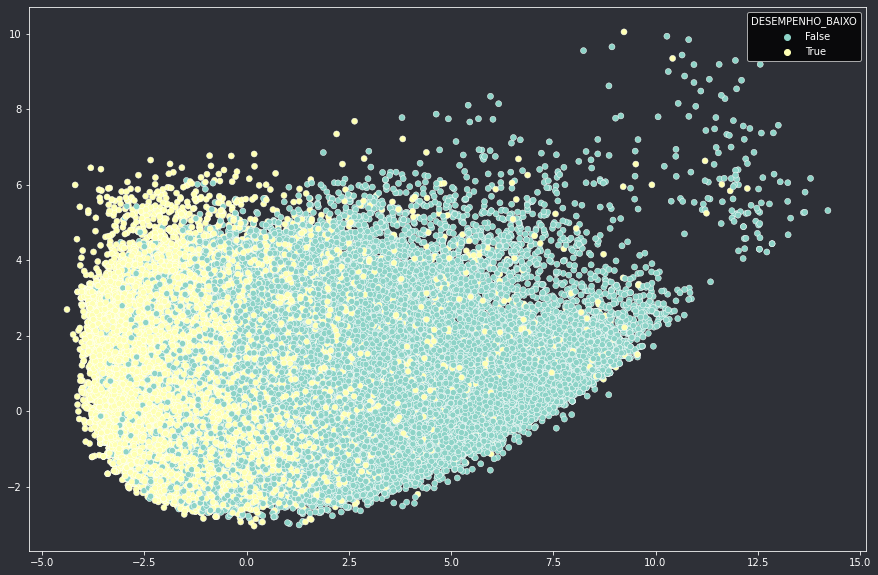

In [5]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["DESEMPENHO_BAIXO"])

### Predictions

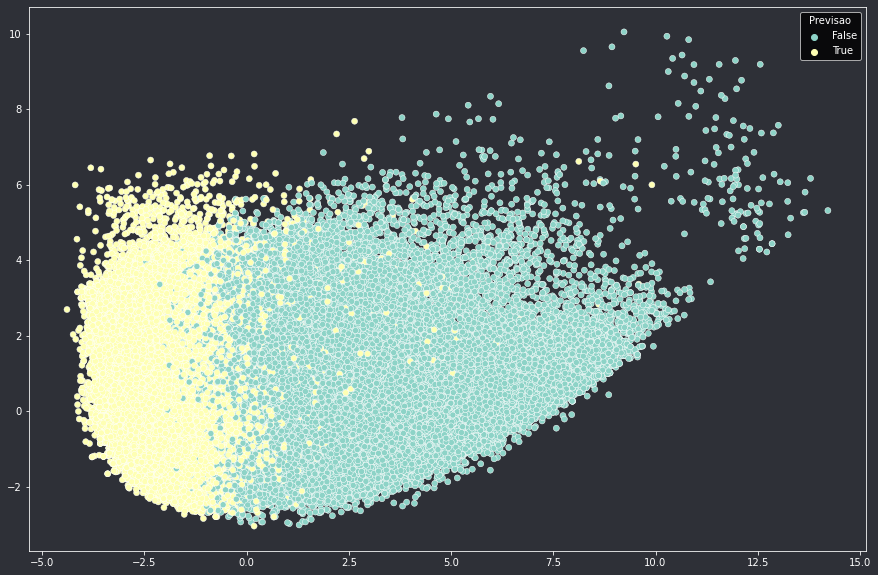

In [6]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Previsao"])

### Errors

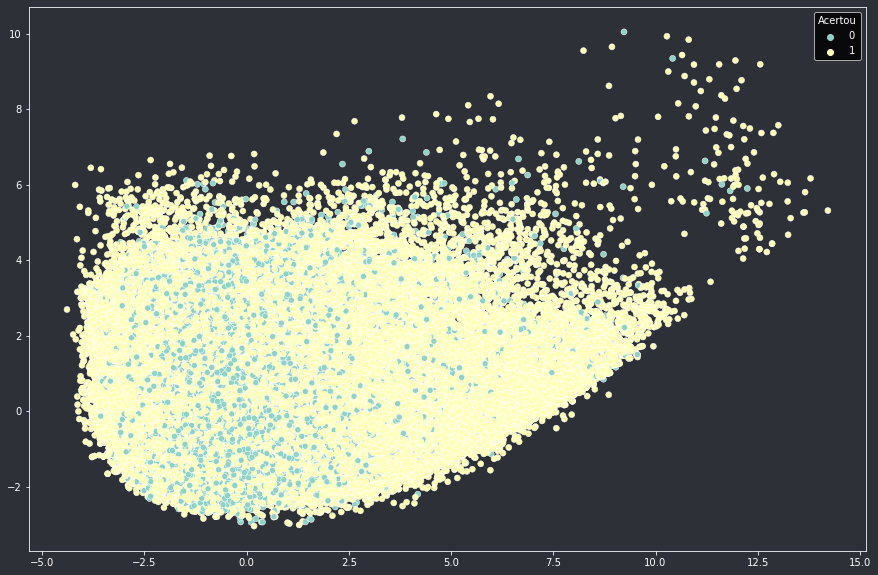

In [7]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Acertou"])

### TP_SEXO

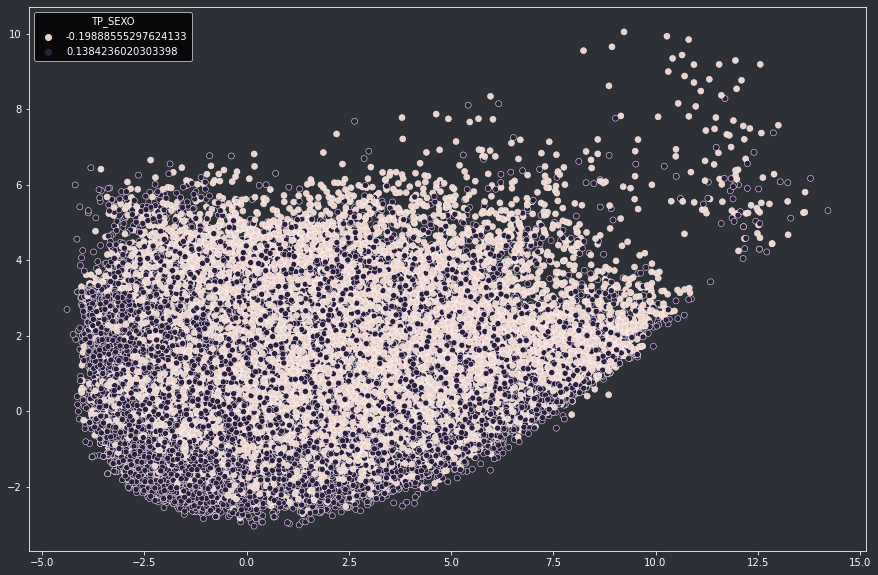

In [8]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_SEXO"])

### TP_COR_RACA

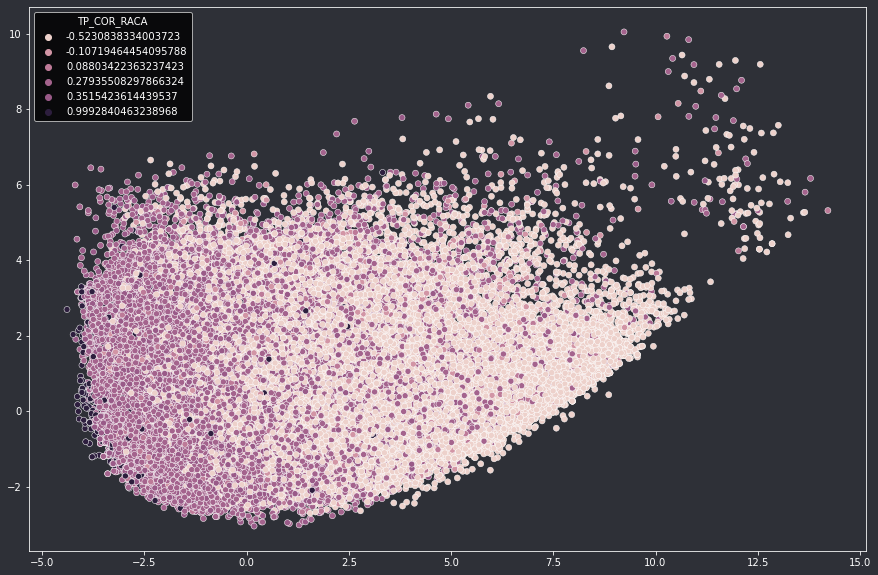

In [9]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_COR_RACA"])


### TP_ESCOLA

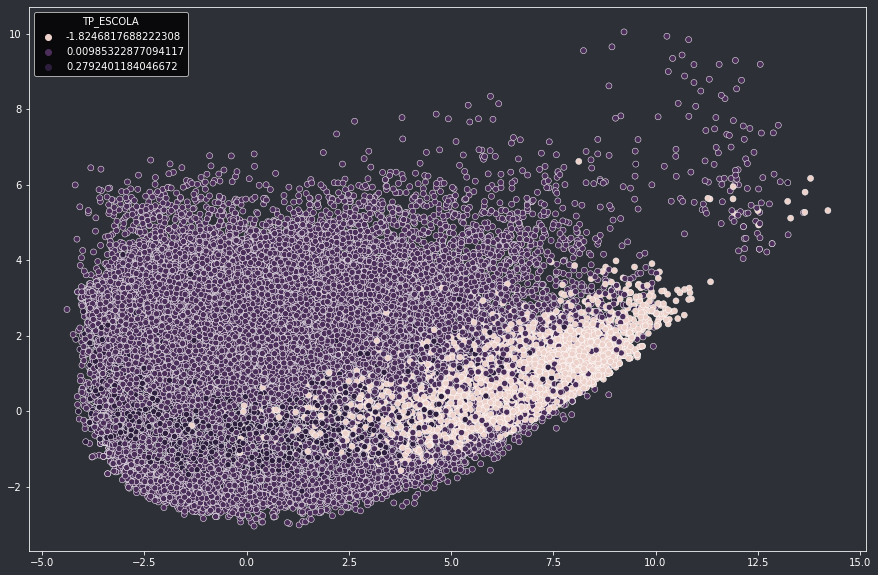

In [10]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_ESCOLA"])

### TP_LINGUA

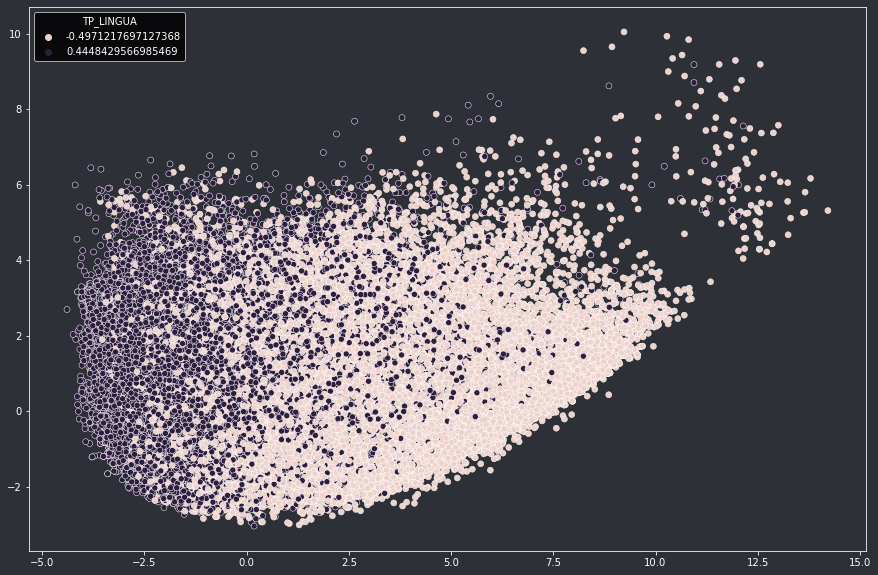

In [11]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_LINGUA"])

### NU_IDADE

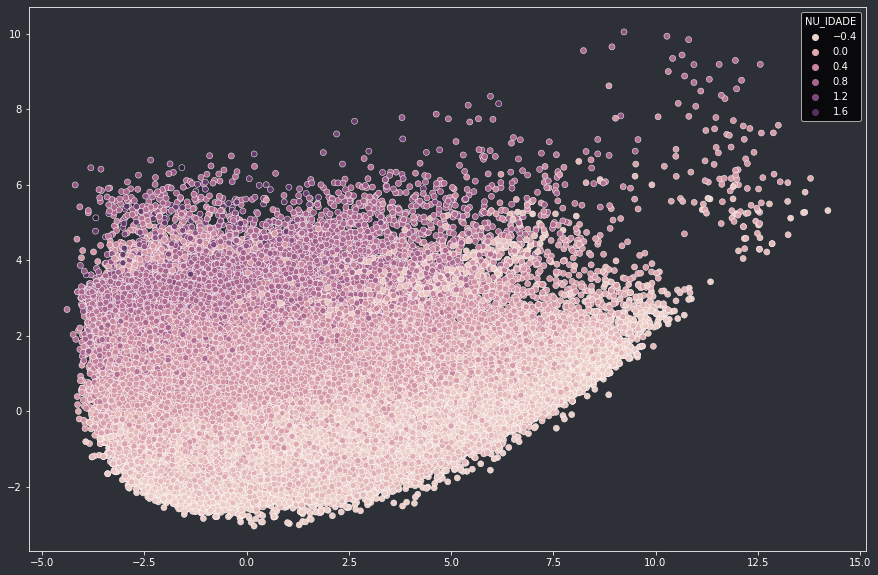

In [12]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["NU_IDADE"])

### TP_ANO_CONCLUIU

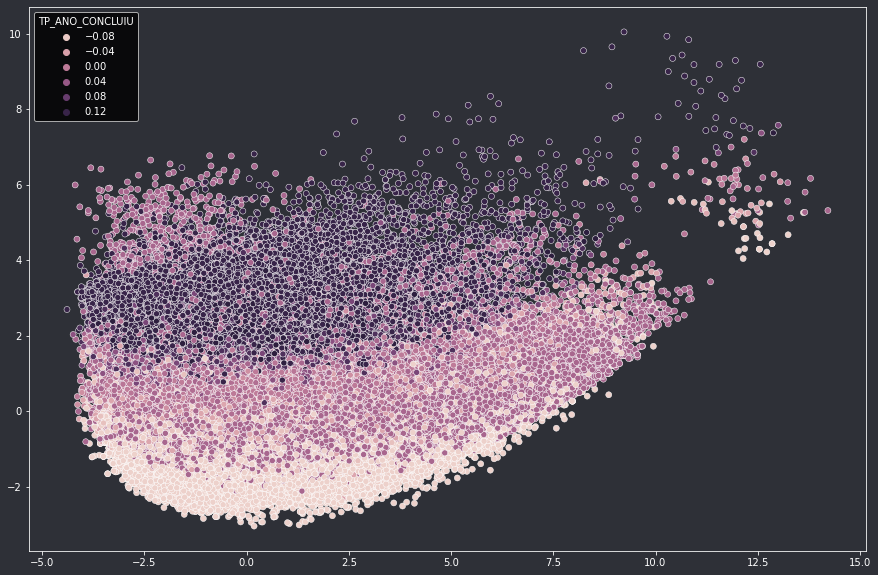

In [13]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_ANO_CONCLUIU"])

### Escolaridade_Pai

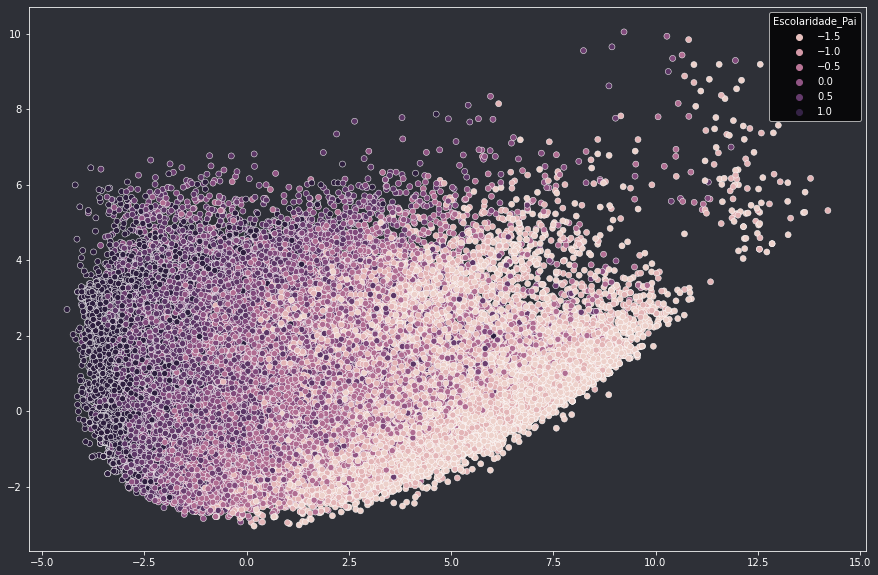

In [14]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Escolaridade_Pai"])

### Escolaridade_Mae

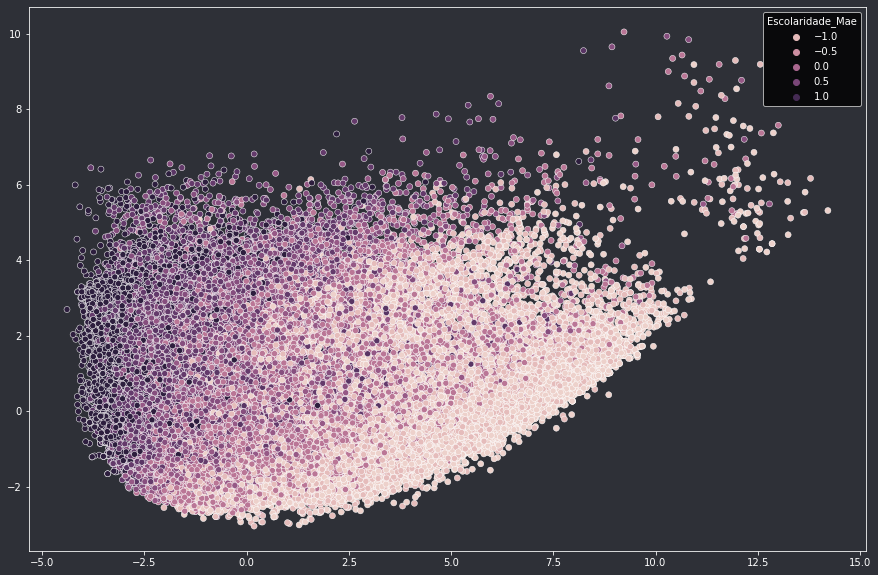

In [15]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Escolaridade_Mae"])

### Ocupacao_Pai

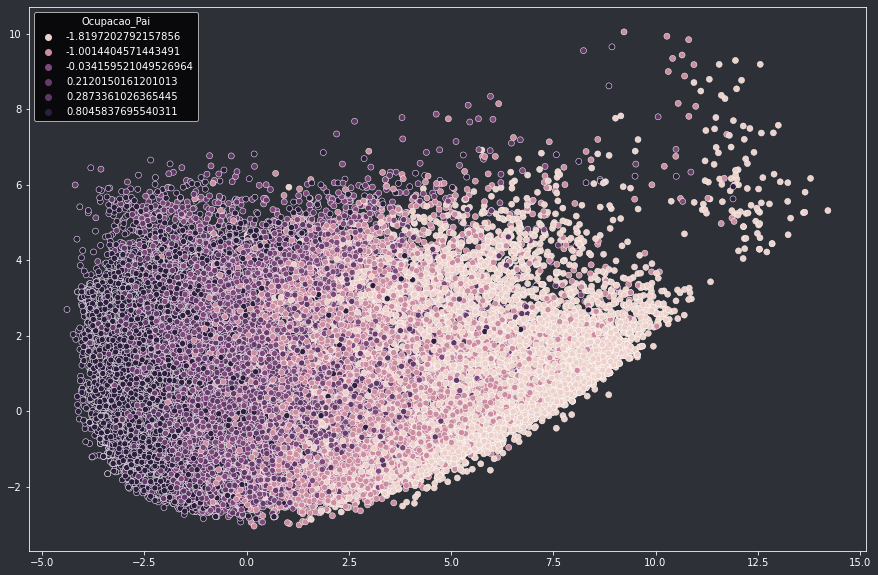

In [16]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Ocupacao_Pai"])

### Renda_Mensal

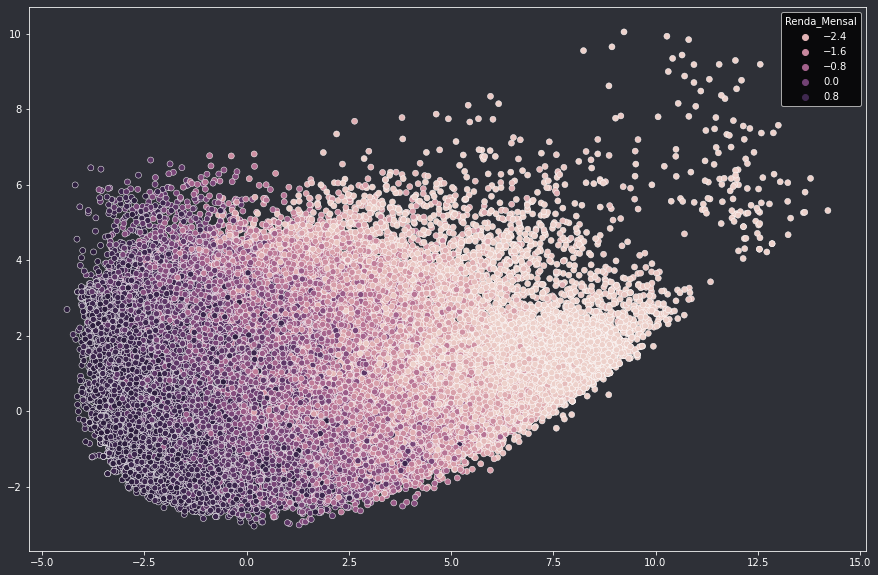

In [17]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Renda_Mensal"])

### Renda_per_capta

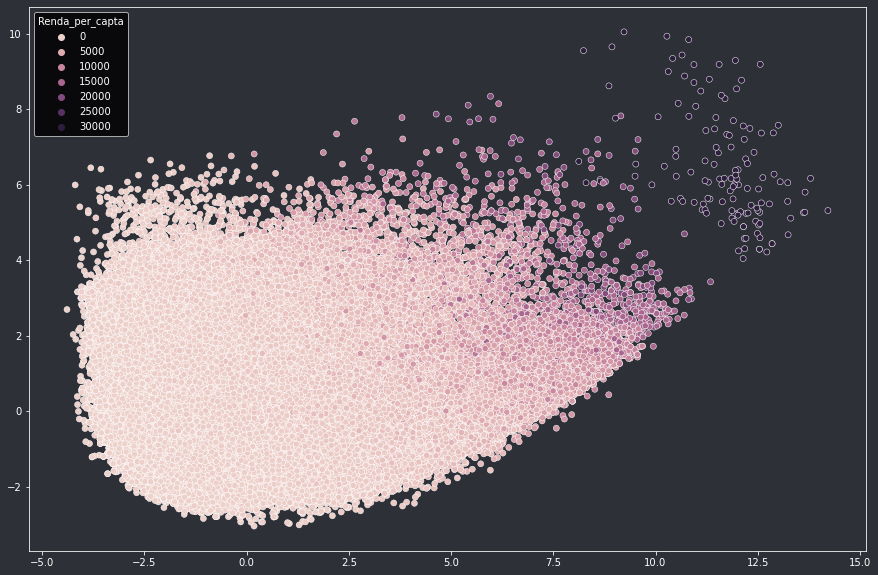

In [18]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Renda_per_capta"])

### TP_ST_CONCLUSAO

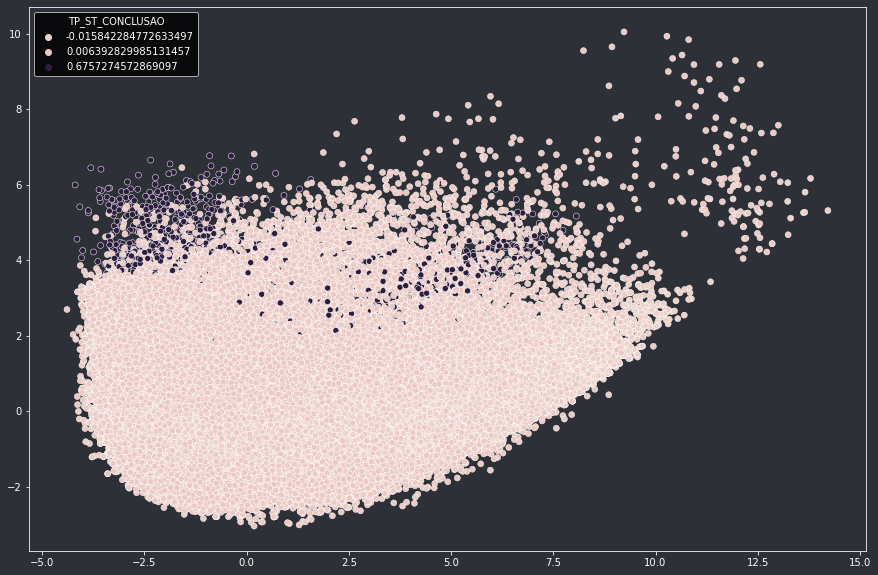

In [20]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_ST_CONCLUSAO"])

### Freezer

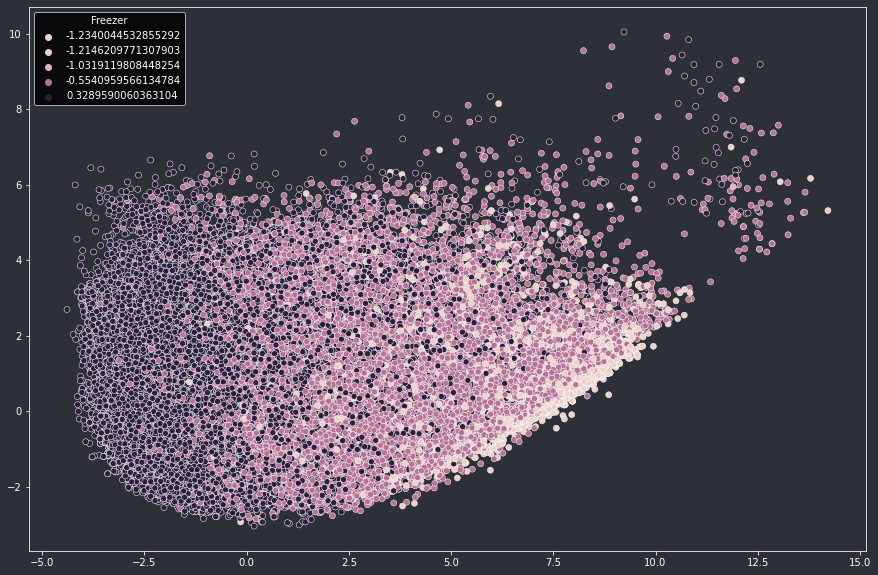

In [19]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Freezer"])